# Sentiment Analysis Classifier


# Stage 1: Business Understanding

Business use case is about building a predictive model that can predict the positive or negative sentiment for customer based on their feedback

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Stage 2:  Data Understanding
The dataset that we are going to use for this "Amazon" product review. The dataset consits of of total #346355 the documents contain positive and negative reviews regarding the product. further details regarding dataset can be found to be at http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care.json.gz  


In [2]:
# df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False, nrows=1000) # testing for purpose only
df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False)
df.shape

(346355, 10)

# Stage 3: Data Preparation

Making an additional column to decide "Positive or Nagative" review based ob the score

In [3]:
df['review_class'] = [1 if x > 3 else 0 for x in df.overall]
df.head(2)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_class
0,0,159985130X,"[1, 1]",5.0,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,1
1,1,159985130X,"[1, 1]",4.0,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,1


### Training and Testing Sets 
Like any other supervised machine learning problems, we need to divide out data into training and testing sets, to do so we used the train_test_split utility from the sklearn.model_selection library

### Finding TFID

Mulitplying the term frequency of a word by the inverse document frequency. The TF stands for "Term frequency" while IDF stand for "Inverse Document Frequency" The ft-idf value increases proportionally to the number of documents in word appears in the document.

The term frequency is calculated as:

Term frequency = (Number of Occurrences of a word)/(Total words in the document)  

And the Inverse Document Frequency is calculated as:

IDF(word) = Log((Total number of documents)/(Number of documents containing the word))  


### Training Text Classification Model and Predicting Sentiment

We have divided our data into training and testing set. Now is the time to see real action, we will use logisticRegression  from sklearn. The fit method of this class used to train the algorithm. we need to pass training target sets tho this method.
Finally, to predict the sentiment for the documents in our text set we can use predict()

The most interesting parameter here is ngram_range - we're telling it to generate 2 and 3 word phrases along with the single words from the corpus.

e.g. if we had the sentence "Python is cool" we'd end up with 6 phrases - 'Python', 'is', 'cool', 'Python is', 'Python is cool' and 'is cool'.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.review_class, test_size=0.3, random_state=0)
 
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')


# Convert a collection of raw documents to a matrix
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8', sublinear_tf=True, max_features=10000, ngram_range=(1,3))
# Learn vocabulary and idf from training set.
vectorizer.fit(x_train.values.astype('U'))
# Learn vocabulary and idf, return term-document matrix. 
# Uses the vocabulary and document frequencies (df) learned by fit.
x_train_tv = vectorizer.transform(x_train.values.astype('U'))
x_test_tv = vectorizer.transform(x_test.values.astype('U'))

x_train shape: (242448,)
y_train shape: (242448,)

x_test shape: (103907,)
y_test shape: (103907,)



# Stage 4: Modeling


In [19]:
# training algorithm 
# model = GaussianNB()
model = LogisticRegression()
# model = svm.SVC()
# model = svm.SVC(kernel='linear')
# model = LinearSVC() # 0.87
# model = tree.DecisionTreeClassifier()
# model = RandomForestClassifier() # 0.82
# model = GradientBoostingClassifier() # 0.83
# Fit the model according to the given training data.
# Training vector, where n_samples is the number of samples and n_features is the number of features.
model.fit(x_train_tv,y_train)
# Predict class labels for samples in X.
y_predict = model.predict(x_test_tv)



# Stage 5 : Evalauation

### Accuracy

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

**Accuracy = No.of correct predictions / Total no.of predictions made**

Mathematically,  accuracy = (tp + tn) / (tp + tn + fp + fn)

* True Positives(tp) : The cases in which we predicted YES and the actual output was also YES.
* True Negatives(tn) : The cases in which we predicted NO and the actual output was YES.
* False Positives(fp) : The cases in which we predicted YES and the actual output was NO.
* False Negatives(fn) : The cases in which we predicted NO and the actual output was also NO.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.


AUC 0.9222848057167831
Score 0.8900362824448786


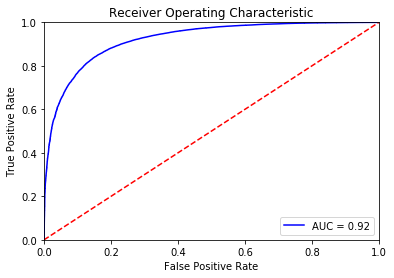

In [34]:

# Accuracy classification score
cv_score = accuracy_score(y_test,y_predict)
# predict probabilities
probs = model.predict_proba(x_test_tv)
probas = probs[:,1]
# AUC report
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probas)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC', roc_auc)
print('Score', cv_score)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Plotting the Accuracy Graph

We used sklearn library to plot score graph against the algorithm


Accuracy score: 0.8900362824448786


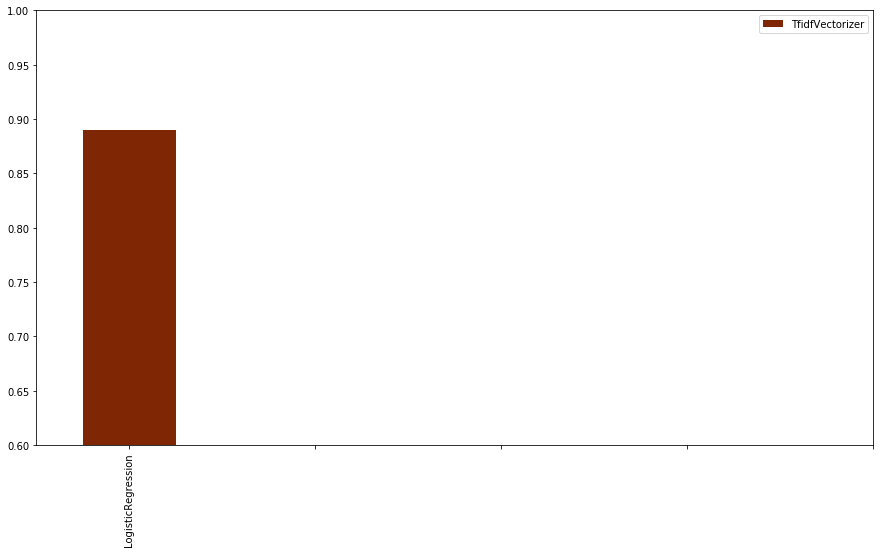

In [21]:
# Plotting the graph
results = {'Model':['LogisticRegression'],
           'TfidfVectorizer':[cv_score]
         }
 
    
results_df = pd.DataFrame(results)
results_df.plot.bar(ylim=(0.60,1.0), figsize=(15,8), align='center', colormap="Oranges_r")
plt.xticks(np.arange(5), results_df.Model)

# printing the out of the score
print('Accuracy score:', cv_score) 

### Reporting

#### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier")
with two rows and two columns that report the number of **false positive** and **false negative**

Each row of the Matrix represents the instances in a predicted class while each column represents the instances in an actual class

 [[11550  8363]
 [ 3063 80931]]


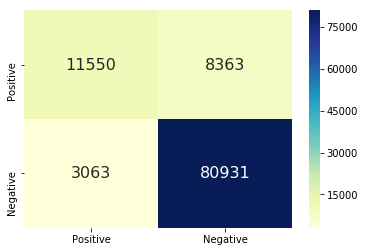

In [41]:
cm = confusion_matrix(y_test, y_predict)
print('',cm)
df_cm = pd.DataFrame(cm, ['Positive', 'Negative'], ['Positive', 'Negative'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap="YlGnBu")

#### Classification Report

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

               precision    recall  f1-score   support

           0       0.75      0.51      0.61     19910
           1       0.89      0.96      0.92     83997

   micro avg       0.87      0.87      0.87    103907
   macro avg       0.82      0.74      0.77    103907
weighted avg       0.87      0.87      0.86    103907



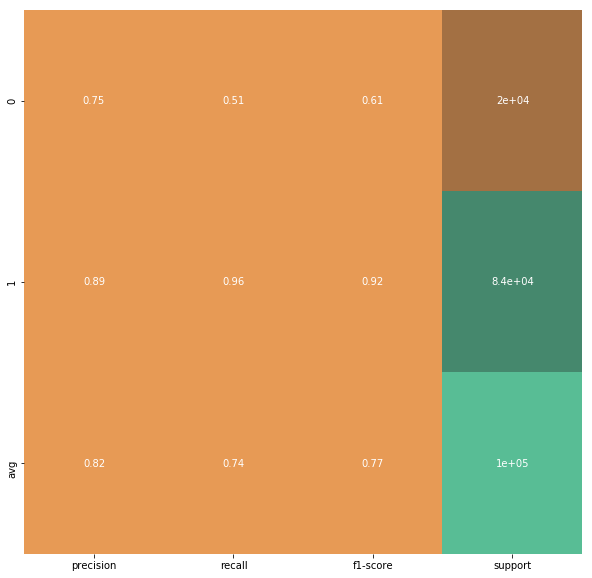

In [24]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
               cmap=sns.diverging_palette(760, 153, l=70, n=7, center="dark"))
    
print('', classification_report(y_test, y_predict))
plot_classification_report(y_test, y_predict)


Now we will actually train model. RNN's like CNN's, are very resource heavy. Keepi g the batch size relatively small is the key enabling this run on your PC at all. In the real word of course. you'd be taking advantange of GPU's installed across many computers on cluster to make this scale a lot better.

### Testing

In [42]:
# read text data from file
df = pd.read_csv("test-data-filtered.csv")
df.head(30)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,2982226,B00LJBMCKK,"[1, 1]",5.0,If you are looking to detox and lose weight th...,"07 17, 2014",A3FIWECGCRBK8R,BRENDA BENJAMIN,PURE RASBERRY KEYTONES,1405555200
1,1,2982227,B00LJBMCKK,"[0, 0]",5.0,When I need the help I turn to Vital and Stron...,"07 17, 2014",A2FU5LRHY17OY2,CanHave,I love Raspberries!,1405555200
2,2,2982228,B00LJBMCKK,"[2, 2]",5.0,"First off, it should be said that this product...","07 16, 2014",A7WCB7DDU6J5Z,Chelsea B,Great with a balanced diet + exercise!,1405468800
3,3,2982229,B00LJBMCKK,"[0, 0]",5.0,Trying to drop a few pounds well then this is ...,"07 22, 2014",A2AVWHAP4IUN0G,Courtney Johnson,Trying to drop a few pounds,1405987200
4,4,2982230,B00LJBMCKK,"[0, 0]",4.0,Easy to swallow...no side effects so far. Help...,"07 21, 2014",AO4D7TQLTI530,crystal cook,Four Stars,1405900800
5,5,2982231,B00LJBMCKK,"[1, 1]",5.0,I like this brand because I have obtained some...,"07 17, 2014",A2NIGPQX34K47O,James Rinehart,I lost a few pounds while eating healthier,1405555200
6,6,2982232,B00LJBMCKK,"[0, 1]",5.0,love it AA+,"07 15, 2014",A1K3L3CVDVSKH2,JOX MONTES,love it,1405382400
7,7,2982233,B00LJBMCKK,"[1, 1]",5.0,My appetite is definitely suppressed - my ener...,"07 17, 2014",A11J1FHCK5U06J,Karinna Ball,Great ingredients!,1405555200
8,8,2982234,B00LJBMCKK,"[0, 0]",5.0,I was drawn to this particular brand because o...,"07 16, 2014",AFVKI7BCS3FSX,Laura hogan,Great!,1405468800
9,9,2982235,B00LJBMCKK,"[0, 0]",4.0,I was a little skeptical at first. I tried it...,"07 22, 2014",A2UMRK7O35GFSK,MARY JANE IORIO,Very happy with product,1405987200


In [43]:
# transformed 
test_vector = vectorizer.transform(df.reviewText.values.astype('U'))
actualPredict = model.predict(test_vector)
actualPredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

#### Printing meaningful output statement for user based on their feedback

In [44]:
for index, feedback in enumerate(actualPredict):
    if(feedback == 1):
        print(index, "Your feedback is Positive")
    else:
        print(index, "Your feedback is Negative")

0 Your feedback is Positive
1 Your feedback is Positive
2 Your feedback is Positive
3 Your feedback is Positive
4 Your feedback is Positive
5 Your feedback is Positive
6 Your feedback is Positive
7 Your feedback is Positive
8 Your feedback is Positive
9 Your feedback is Positive
10 Your feedback is Positive
11 Your feedback is Positive
12 Your feedback is Positive
13 Your feedback is Negative
14 Your feedback is Positive
15 Your feedback is Positive
16 Your feedback is Positive
17 Your feedback is Positive
18 Your feedback is Positive
19 Your feedback is Positive
20 Your feedback is Positive
21 Your feedback is Positive
22 Your feedback is Positive
23 Your feedback is Positive
24 Your feedback is Positive
25 Your feedback is Positive
26 Your feedback is Positive
27 Your feedback is Positive
28 Your feedback is Positive
29 Your feedback is Positive
30 Your feedback is Positive
31 Your feedback is Positive
32 Your feedback is Positive
33 Your feedback is Positive
34 Your feedback is Posi

# Stage 6: Deployment

In [46]:
joblib.dump(vectorizer, 'classical-vectorizer.joblib') 
joblib.dump(model,'classical-model.joblib')

['classical-model.joblib']

In [22]:
newVector = joblib.load('classfical-vectorizer.joblib') 
newModel = joblib.load('classical-model.joblib') 


array([1], dtype=int64)

In [28]:
# transformed 
mytext = 'Worst product I have seen ever'
myVectortest = newVector.transform([mytext])
joblibPrectict = newModel.predict(myVectortest)

for index, feedback in enumerate(joblibPrectict):
    if(feedback == 1):
        print("Your feedback is Positive")
    else:
        print("Your feedback is Negative")

Your feedback is Negative
